# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Tsabita Putri Ramadhany
- **Email:** bitharamadhany@gmail.com
- **ID Dicoding:** nighthawkye

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh variasi harga dan biaya pengiriman terhadap kepuasan pelanggan, dan bagaimana kita bisa mengoptimalkan keduanya untuk meningkatkan ulasan positif serta meningkatkan penjualan?
- Bagaimana waktu pengiriman mempengaruhi kepuasan pelanggan dan frekuensi pembelian ulang? Apa langkah-langkah yang dapat diambil untuk memperpendek waktu pengiriman dan meningkatkan kepuasan pelanggan, serta mendorong pembelian ulang?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Melihat 5 record teratas untuk data `customers_dataset.csv` yang telah dimasukkan pada variabel `customers_df`

In [5]:
geolocation_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Melihat 5 record teratas untuk data `geolocation_dataset.csv` yang telah dimasukkan pada variabel `geolocation_df`

In [6]:
order_items_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Melihat 5 record teratas untuk data `order_items_dataset.csv` yang telah dimasukkan pada variabel `order_items_df`

In [7]:
order_payments_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Melihat 5 record teratas untuk data `order_payments_dataset.csv` yang telah dimasukkan pada variabel `order_payments_df`

In [8]:
order_reviews_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Melihat 5 record teratas untuk data `order_reviews_dataset.csv` yang telah dimasukkan pada variabel `order_reviews_df`

In [9]:
orders_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Melihat 5 record teratas untuk data `orders_dataset.csv` yang telah dimasukkan pada variabel `orders_df`

In [10]:
products_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Melihat 5 record teratas untuk data `products_dataset.csv` yang telah dimasukkan pada variabel `products_df`

In [11]:
sellers_df = pd.read_csv('/content/drive/MyDrive/Analisis_Data/ECommerce_Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Melihat 5 record teratas untuk data `products_dataset.csv` yang telah dimasukkan pada variabel `products_df`

### Assessing Data

In [12]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


melihat informasi pada table `customers_df`. hasilnya tidak ada kesalahan pada `data type`

In [13]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

check apakah ada missing value. hasilnya tidak ada missing value

In [14]:
print("Number of duplication: ", customers_df.duplicated().sum())

Number of duplication:  0


check apakah ada data yang terduplikasi, hasilnya tidak ada data terduplikasi

In [15]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Terdapat kesalahan untuk data type `order_purchase_timestamp`, `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`, `order_estimated_delivery_date`. dari object menjadi `datetime`

In [17]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terdapat missing value pada `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`

In [18]:
print("Number of duplication: ", orders_df.duplicated().sum())

Number of duplication:  0


tidak ada data yang terduplikasi

In [19]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


terdapat kesalahan data type pada `shipping_limit_date` harusnya menjadi `datetime`

In [21]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

tidak ada missing value

In [22]:
print("Number of duplication: ", order_items_df.duplicated().sum())

Number of duplication:  0


tidak ada data terduplikasi

In [23]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


unique dan count pada `order_id` tidak sama karena ada kasus pelanggan yang membeli beberapa barang dalam sekali pesanan

In [24]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


data type `product_photos_qty`seharusnya menjadi `int`


In [25]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

terdapat missing value pada `product_category_name`, `product_name_lenght`, `product_description_lenght`

In [26]:
print("Number of duplication: ", products_df.duplicated().sum())

Number of duplication:  0


tidak ada data terduplikasi

In [27]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [28]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


data type `review_creation_date` dan `review_answer_timestamp` seharusnya `datetime`

In [29]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

terdapat missing value pada `review_comment_title`, `review_comment_message`

In [30]:
print("Number of duplication: ", order_reviews_df.duplicated().sum())

Number of duplication:  0


tidak ada data terduplikasi

In [31]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


| DataFrame        | Data type Corrections                                   | Missing Values                                                                 | Duplicate Data | Inaccurate Values |
|------------------|---------------------------------------------------------|--------------------------------------------------------------------------------|----------------|-------------------|
| `customers_df`   | -                                                       | -                                                                              | -              | -                 |
| `orders_df`      | Kesalahan tipe data pada kolom timestamp harus diperbaiki menjadi `datetime`. | Terdapat missing values pada `order_approved_at`, `order_delivered_carrier_date`, `order_delivered_customer_date`. | -              | -                 |
| `order_items_df` | Tipe data pada `shipping_limit_date` harusnya `datetime`. | -                                                                              | -              | -                 |
| `products_df`    | Tipe data `product_photos_qty` harusnya `int`.          | Terdapat missing values pada `product_category_name`, `product_name_lenght`, `product_description_length`. | -              | -                 |
| `order_reviews_df` | Tipe data `review_creation_date` dan `review_answer_timestamp` harusnya `datetime`. | Terdapat missing values pada `review_comment_title`, `review_comment_message`. | -              | -                 |


### Cleaning Data

In [32]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

mengganti tipe data menjadi `datetime`

In [33]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


tipe data sudah benar

In [96]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


terlihat jika `order_status == canceled` maka akan terjadi missing value pada `order_approved_at, order_delivered_carrier_date, order_delivered_customer_date`

In [61]:
orders_df.order_status.value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

selain `canceled`, ada order yang tidak terlaksana yaitu `unavailable`

In [98]:
orders_df[orders_df.order_status == "unavailable"].sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
14382,9566b36fbba7756a79b5d2cba4e058d9,6c60cba0b553924964bcbf588c7fec36,unavailable,2017-07-10 16:47:00,2017-07-13 10:04:11,NaT,NaT,2017-07-21
76847,1e4dc51447faa970879bb120932eebb6,62713a902fd08c5ef31f5f108e95a168,unavailable,2018-01-22 09:27:54,2018-01-23 03:52:47,NaT,NaT,2018-02-14
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
33945,e804ad37d90d9c32dc3ae61e90a06345,eb18d64ac5fd600895682f2c78731b4d,unavailable,2017-12-06 19:30:43,2017-12-06 19:38:24,NaT,NaT,2018-01-02
56152,72fa449394ed9dc9093819f93ca563af,186fb45d0f4c178da2ccac34abfa5ec6,unavailable,2017-05-26 17:19:49,2017-05-30 05:02:23,NaT,NaT,2017-06-16
49879,3a0fbe8fbdae776394cd93385366a4fd,240316d3cc8d0622aa5a02aa0de18115,unavailable,2017-12-12 14:23:58,2017-12-12 15:31:22,NaT,NaT,2018-01-08
44571,69c49491c1300f416d32e8bedc9f8907,1223d05f13c9da072919d40915747b8d,unavailable,2017-10-26 10:35:27,2017-10-26 10:49:24,NaT,NaT,2017-11-08
28992,a3777b94ef07749f031ade4ae824ddb2,65b2d78564e9d776cca877028b764eac,unavailable,2017-05-30 20:06:02,2017-05-31 06:45:24,NaT,NaT,2017-06-28
70414,a327b5ecc65060cc462211724d715367,f63b5a41ad60764ade63d0cae2f8b5b2,unavailable,2017-12-08 22:41:10,2017-12-08 22:52:43,NaT,NaT,2017-12-27
18334,6d928ae5792f61a71bb3e3e528bf4a28,d9d61633a0d9de07e5224885bbae0c7a,unavailable,2017-05-06 14:18:42,2017-05-06 14:25:22,NaT,NaT,2017-06-02


terlihat jika `order_status == unavailable` maka akan terjadi missing value pada `order_delivered_carrier_date, order_delivered_customer_date`

In [99]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

terjadinya missing value kemungkinan karena
1. jika `order_status == canceled` maka akan terjadi missing value pada `order_approved_at, order_delivered_carrier_date, order_delivered_customer_date`
2. jika `order_status == unavailable` maka akan terjadi missing value pada `order_delivered_carrier_date, order_delivered_customer_date`. karena pesanan yang sudah terlanjur dipesan ternyata tidak tersedia sehingga kurir dan customer tidak bisa menerima barang
3. jika `order_status == shipped` maka akan terjadi missing value pada `order_delivered_customer_date`. karena pesanan masih dikirim, customer belum menerima
4. jika `order_status == invoiced` maka akan terjadi missing value pada `order_delivered_carrier_date, order_delivered_customer_date`. karena customer masih belum membayar pesanan, sehingga pesanan belum dapat diberikan kepada kurir yang membuat customer juga belum menerima pesanan
5. jika `order_status == processing` maka akan terjadi missing value pada `order_delivered_carrier_date, order_delivered_customer_date`. karena customer sudah membayar pesanan dan pesanan sudah di approve sistem. tetapi pesanan masih disiapkan sehingga belum dapat diberikan kepada kurir yang membuat customer juga belum menerima pesanan
6. jika `order_status == created` maka akan terjadi missing value pada `order_approved_at, order_delivered_carrier_date, order_delivered_customer_date` karena pesanan sudah dibuat tetapi belum di approve oleh sistem
7. jika `order_status == approved` maka akan terjadi missing value pada `order_delivered_carrier_date, order_delivered_customer_date`. karena customer sudah membayar pesanan dan pesanan baru saja di approve sistem, tetapi penjual belum menyiapkan pesanan sehingga belum dapat diberikan kepada kurir yang membuat customer juga belum menerima pesanan

In [121]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == delivered:", count_missing_order_approved_at)

count_missing_order_delivered_carrier_date = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna())].shape[0]
print("missing value pada order_delivered_carrier_date untuk order_status == delivered:", count_missing_order_delivered_carrier_date)

count_missing_order_delivered_customer_date = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna())].shape[0]
print("missing value pada order_delivered_customer_date untuk order_status == delivered:", count_missing_order_delivered_customer_date)

missing value pada order_approved_at untuk order_status == delivered: 14
missing value pada order_delivered_carrier_date untuk order_status == delivered: 2
missing value pada order_delivered_customer_date untuk order_status == delivered: 8


In [125]:
valid_time_diff = (orders_df['order_approved_at'] - orders_df['order_purchase_timestamp']).dropna()

proses untuk mengimputasi missing value pada `order_approve_at` untuk `order_status == delivered`. yang pertama dengan cara menghitung jarak antara `order_approved_at` dan `order_purchase_timestamp`

In [126]:
avg_time_diff = valid_time_diff.mean()

orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isna()), 'order_approved_at'] = orders_df['order_purchase_timestamp'] + avg_time_diff

lalu menghitung rata rata jarak antara `order_approved_at` dan `order_purchase_timestamp`. selanjutnya impute missing value dengan cara `order_purchase_timestamp` ditambah rata-rata jarak

In [130]:
valid_time_diff = (orders_df['order_delivered_carrier_date'] - orders_df['order_approved_at']).dropna()

avg_time_diff = valid_time_diff.mean()

orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna()), 'order_delivered_carrier_date'] = orders_df['order_approved_at'] + avg_time_diff

proses untuk mengimputasi missing value pada `order_delivered_carrier_date` untuk `order_status == delivered`.
1. menghitung jarak antara `order_approved_at` dan `order_delivered_carrier_date`
2. menghitung rata rata jarak antara `order_approved_at` dan `order_delivered_carrier_date`
3. impute missing value dengan cara `order_approved_at` ditambah rata-rata jarak

In [134]:
valid_time_diff = (orders_df['order_delivered_customer_date'] - orders_df['order_delivered_carrier_date']).dropna()

avg_time_diff = valid_time_diff.mean()

orders_df.loc[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna()), 'order_delivered_customer_date'] = orders_df['order_delivered_carrier_date'] + avg_time_diff

proses untuk mengimputasi missing value pada `order_delivered_customer_date` untuk `order_status == delivered`.
1. menghitung jarak antara `order_customer_at` dan `order_delivered_carrier_date`
2. menghitung rata rata jarak antara `order_customer_at` dan `order_delivered_carrier_date`
3. impute missing value dengan cara `order_delivered_carrier_date` ditambah rata-rata jarak

In [137]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == delivered:", count_missing_order_approved_at)

count_missing_order_delivered_carrier_date = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_carrier_date'].isna())].shape[0]
print("missing value pada order_delivered_carrier_date untuk order_status == delivered:", count_missing_order_delivered_carrier_date)

count_missing_order_delivered_customer_date = orders_df[(orders_df['order_status'] == 'delivered') & (orders_df['order_delivered_customer_date'].isna())].shape[0]
print("missing value pada order_delivered_customer_date untuk order_status == delivered:", count_missing_order_delivered_customer_date)

missing value pada order_approved_at untuk order_status == delivered: 0
missing value pada order_delivered_carrier_date untuk order_status == delivered: 0
missing value pada order_delivered_customer_date untuk order_status == delivered: 0


tidak ada missing value

In [138]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'unavailable') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == unavailable:", count_missing_order_approved_at)

missing value pada order_approved_at untuk order_status == unavailable: 0


tidak ada missing value

In [139]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'shipped') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == shipped:", count_missing_order_approved_at)

count_missing_order_delivered_carrier_date = orders_df[(orders_df['order_status'] == 'shipped') & (orders_df['order_delivered_carrier_date'].isna())].shape[0]
print("missing value pada order_delivered_carrier_date untuk order_status == shipped:", count_missing_order_delivered_carrier_date)

missing value pada order_approved_at untuk order_status == shipped: 0
missing value pada order_delivered_carrier_date untuk order_status == shipped: 0


tidak ada missing value

In [140]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'invoiced') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == invoiced:", count_missing_order_approved_at)

missing value pada order_approved_at untuk order_status == invoiced: 0


tidak ada missing value

In [141]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'processing') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == processing:", count_missing_order_approved_at)

missing value pada order_approved_at untuk order_status == processing: 0


tidak ada missing value

In [142]:
count_missing_order_approved_at = orders_df[(orders_df['order_status'] == 'approved') & (orders_df['order_approved_at'].isna())].shape[0]
print("missing value pada order_approved_at untuk order_status == approved:", count_missing_order_approved_at)

missing value pada order_approved_at untuk order_status == approved: 0


tidak ada missing value. semua missing value karena error sudah teratasi

In [143]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 146
order_delivered_carrier_date     1781
order_delivered_customer_date    2957
order_estimated_delivery_date       0
dtype: int64

- adanya missing value tersebut karena sifat dari masing masing kategori status pesanan. untuk missing value karena error sudah teratasi
- missing value tersebut tidak di drop karena akan mempengaruhi proses analisis

In [146]:
orders_df.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
98329,36c5444b254b4f1810d3ece9523fca71,26ae76bd34b19ca8abfef8155f68d468,delivered,2017-05-29 20:17:31,2017-05-29 20:30:28,2017-06-02 15:55:28,2017-06-19 14:48:05,2017-06-26
58845,1e7d25f611e794f9614dd3e10a8596e7,8be45a1114ff0e79615f7b8189aec7df,delivered,2018-08-01 19:43:06,2018-08-01 20:30:23,2018-08-07 16:59:00,2018-09-21 15:55:02,2018-08-23
56714,0403bed7b44fb735b6af72505c57fdd3,1ae3d1ac4e9f72126d07ba9dff0c3762,delivered,2017-07-17 22:37:39,2017-07-19 04:32:55,2017-07-21 14:22:33,2017-07-26 20:57:28,2017-08-04
54264,87165c6641d05fb32802b8c65dd40ea9,f8df2382fa1d0fd8c3b44994f3dc2ea3,delivered,2017-11-27 16:19:52,2017-11-27 16:39:24,2017-11-29 18:08:59,2017-12-14 23:18:33,2017-12-22
56578,b2a3423735119b088bc62dd62cf053a8,7e6b8b2bdb547f7343c0d28f2ed5662e,delivered,2018-08-02 12:06:07,2018-08-02 13:04:23,2018-08-10 12:27:00,2018-08-13 23:48:44,2018-08-09
97621,2321337240c200736e346c2445003fd3,c2d4ece79b2ae91bb5c600af6b6672a8,shipped,2018-05-09 20:21:21,2018-05-10 20:17:45,2018-05-11 14:45:00,NaT,2018-05-23
77301,3bf5c888a106e0e27fd82eb268baa621,1c696296295bcaedd258474aad4284cf,delivered,2017-04-08 19:07:40,2017-04-08 19:22:25,2017-04-10 12:24:06,2017-04-12 13:53:05,2017-05-09
98263,853052349cf24c16fe2a0a29df1d7a12,32a6de394291b7bd2e1300ae6d801433,delivered,2018-02-17 01:27:48,2018-02-17 02:07:51,2018-02-20 02:12:50,2018-02-23 16:23:19,2018-03-15
57993,9695692d040abab63df40b68c2905278,22245e5e8a9b0a5f9ea62d9aefc4e5fe,delivered,2018-03-26 08:31:15,2018-03-28 02:47:23,2018-04-13 17:04:02,2018-05-08 22:58:27,2018-04-26
35869,313e60572316093cd1a9a5db042389a9,ba6e59cb5236d13908b6fc94e36ec889,delivered,2018-05-01 15:50:07,2018-05-01 16:14:47,2018-05-03 14:36:00,2018-05-08 17:28:46,2018-06-05


berhasil diaplikasikan

In [166]:
orders_df['delivery_time'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
outliers_condition = orders_df['delivery_time'] > 90
orders_df_cleaned = orders_df[~outliers_condition]
orders_df_cleaned

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0
...,...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,8.0
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,22.0
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,24.0
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,17.0


menghapus outliers jika >90 hari (3 bulan) pesanan belum diterima

In [34]:
datetime_columns = ["shipping_limit_date"]

for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

mengganti tipe data menjadi `datetime`

In [35]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


tipe data sudah benar. kesalahan data type pada `order_items_df` **solved**

In [36]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [37]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

check missing value

In [38]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
products_df.dropna(subset=['product_weight_g'], inplace=True)

karena hanya 2 records yang missing maka di drop

In [40]:
products_df.isna().sum()

product_id                      0
product_category_name         609
product_name_lenght           609
product_description_lenght    609
product_photos_qty            609
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

missing value berkurang

In [41]:
description_stats = products_df[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].describe()

if 'median' in description_stats.index:
    median_photos_qty = description_stats.loc['50%', 'product_photos_qty']
else:
    median_photos_qty = products_df['product_photos_qty'].median()

imputation_values = {
    'product_name_lenght': description_stats.loc['mean', 'product_name_lenght'],
    'product_description_lenght': description_stats.loc['mean', 'product_description_lenght'],
    'product_photos_qty': median_photos_qty
}

products_df.fillna(value=imputation_values, inplace=True)

mengimputasi
1. `product_name_lenght` dengan rata-rata `product_name_lenght`
2. `product_description_lenght` dengan rata-rata `product_description_lenght`
3. `product_photos_qty` dengan nilai tengah (median) `product_photos_qty`

In [42]:
products_df.isna().sum()

product_id                      0
product_category_name         609
product_name_lenght             0
product_description_lenght      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

missing value berkurang

In [43]:
products_df.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

terdapat inconsistent data pada
- `eletrodomesticos` dan `eletrodomesticos_2`
- `casa_conforto` dan `casa_conforto_2`

In [46]:
products_df.product_category_name = products_df.product_category_name.apply(lambda x: 'casa_conforto' if isinstance(x, str) and 'casa_conforto_2' in x else x)
products_df.product_category_name = products_df.product_category_name.apply(lambda x: 'eletrodomesticos' if isinstance(x, str) and 'eletrodomesticos_2' in x else x)

menyatukan data yang tidak konsisten

In [47]:
products_df.product_category_name.unique()

array(['perfumaria', 'artes', 'esporte_lazer', 'bebes',
       'utilidades_domesticas', 'instrumentos_musicais', 'cool_stuff',
       'moveis_decoracao', 'eletrodomesticos', 'brinquedos',
       'cama_mesa_banho', 'construcao_ferramentas_seguranca',
       'informatica_acessorios', 'beleza_saude', 'malas_acessorios',
       'ferramentas_jardim', 'moveis_escritorio', 'automotivo',
       'eletronicos', 'fashion_calcados', 'telefonia', 'papelaria',
       'fashion_bolsas_e_acessorios', 'pcs', 'casa_construcao',
       'relogios_presentes', 'construcao_ferramentas_construcao',
       'pet_shop', 'eletroportateis', 'agro_industria_e_comercio', nan,
       'moveis_sala', 'sinalizacao_e_seguranca', 'climatizacao',
       'consoles_games', 'livros_interesse_geral',
       'construcao_ferramentas_ferramentas',
       'fashion_underwear_e_moda_praia', 'fashion_roupa_masculina',
       'moveis_cozinha_area_de_servico_jantar_e_jardim',
       'industria_comercio_e_negocios', 'telefonia_fixa',
   

inconsistent data teratasi

In [48]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
tablets_impressao_imagem            9
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 71, dtype: int64

In [133]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,48.476592,771.492393,1.0,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,48.476592,771.492393,1.0,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,48.476592,771.492393,1.0,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,48.476592,771.492393,1.0,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,48.476592,771.492393,1.0,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,48.476592,771.492393,1.0,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,48.476592,771.492393,1.0,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,48.476592,771.492393,1.0,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,48.476592,771.492393,1.0,1300.0,45.0,16.0,45.0


In [134]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476592,771.492393,2.166985,2276.472488,30.815078,16.937661,23.196728
std,10.150568,629.227735,1.728097,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [137]:
category_descriptions = products_df.groupby('product_category_name')[['product_name_lenght', 'product_description_lenght', 'product_photos_qty']].describe()
category_descriptions.sort_values(by=('product_name_lenght', 'count'), ascending=False).head(3)

product_name_lenght                                    \
                                    count       mean        std   min   25%   
product_category_name                                                         
cama_mesa_banho                    3029.0  51.728293   7.646314  16.0  49.0   
esporte_lazer                      2867.0  46.963376  10.510374   9.0  40.0   
moveis_decoracao                   2657.0  50.050433  10.889112   5.0  44.0   

                                        product_description_lenght  \
                        50%   75%   max                      count   
product_category_name                                                
cama_mesa_banho        54.0  57.0  68.0                     3029.0   
esporte_lazer          49.0  56.0  64.0                     2867.0   
moveis_decoracao       53.0  58.0  72.0                     2657.0   

                                   ...                 product_photos_qty  \
                             mean  ...     75%     max              count   
product_category_name              ...                                      
cama_mesa_banho        464.483328  ...   609.0  3863.0             3029.0   
esporte_lazer          954.050576  ...  1223.0  3985.0             2867.0   
moveis_decoracao       799.250659  ...  1045.0  3781.0             2657.0   

                                                                     
                           mean       std  min  25%  50%  75%   max  
product_category_name                                                
cama_mesa_banho        1.392539  0.874992  1.0  1.0  1.0  1.0   9.0  
esporte_lazer          2.135333  1.701513  1.0  1.0  1.0  3.0  11.0  
moveis_decoracao       2.400828  1.928320  1.0  1.0  2.0  3.0  15.0  

[3 rows x 24 columns]

In [123]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [54]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [59]:
products_df[products_df.product_category_name == "cama_mesa_banho"].describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,3029,3029,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000,3029.000000
unique,3029,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,14aa47b7fe5c25522b47b4b29c98dcb9,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,51.728293,464.483328,1.392539,2456.405084,36.774183,14.091119,30.589964
std,NaN,NaN,7.646314,385.235244,0.874992,3732.667484,13.680511,9.628311,11.182182
min,NaN,NaN,16.000000,58.000000,1.000000,0.000000,12.000000,2.000000,7.000000
25%,NaN,NaN,49.000000,236.000000,1.000000,700.000000,28.000000,8.000000,22.000000
50%,NaN,NaN,54.000000,365.000000,1.000000,1250.000000,37.000000,11.000000,30.000000
75%,NaN,NaN,57.000000,609.000000,1.000000,2300.000000,45.000000,17.000000,37.000000


In [60]:
products_df[products_df.product_category_name == "esporte_lazer"].describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,2867,2867,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000,2867.000000
unique,2867,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,96bd76ec8810374ed1b65e291975717f,esporte_lazer,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2867,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,46.963376,954.050576,2.135333,2024.670736,31.280084,18.109871,20.824206
std,NaN,NaN,10.510374,768.522851,1.701513,3973.126852,19.510497,12.317310,9.049746
min,NaN,NaN,9.000000,33.000000,1.000000,50.000000,12.000000,2.000000,10.000000
25%,NaN,NaN,40.000000,423.000000,1.000000,350.000000,20.000000,10.000000,15.000000
50%,NaN,NaN,49.000000,733.000000,1.000000,750.000000,25.000000,16.000000,20.000000
75%,NaN,NaN,56.000000,1223.000000,3.000000,1800.000000,34.000000,22.000000,25.000000


In [49]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

missing value pada `review_comment_title` dan `review_comment_message`

In [50]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [58]:
review_score_5 = order_reviews_df[order_reviews_df['review_score'] == 5]
comment_counts = review_score_5['review_comment_title'].value_counts()
print(comment_counts)

Recomendo                    276
super recomendo              244
Excelente                    239
Ótimo                        207
Super recomendo              199
                            ... 
Mercadoria recebida            1
Aparador de livros abraço      1
Óculos feminino                1
Compraria Novamente            1
OTIMA EMBALAGEM                1
Name: review_comment_title, Length: 2172, dtype: int64


check jumlah `review_comment_title` pada bintang 5

In [59]:
review_score_4 = order_reviews_df[order_reviews_df['review_score'] == 4]
comment_counts = review_score_4['review_comment_title'].value_counts()
print(comment_counts)

recomendo           125
Recomendo           121
Bom                  95
Muito bom            60
Boa                  45
                   ... 
Entrega demorada      1
Entregue              1
Indico                1
Relógio               1
👍                     1
Name: review_comment_title, Length: 746, dtype: int64


check jumlah `review_comment_title` pada bintang 4

In [60]:
order_reviews_df.review_comment_title = order_reviews_df.review_comment_title.apply(lambda x: 'recomendo' if isinstance(x, str) and 'Recomendo' in x else x)

menyatukan data yang tidak konsisten

In [61]:
order_reviews_df.review_comment_title.value_counts()

recomendo                    1048
Bom                           293
super recomendo               270
Excelente                     248
Muito bom                     247
                             ... 
Produto diferente da imag       1
insatisfeito com a loja         1
Recebi produto diferente        1
MUITO SATISFATÓRIA              1
Foto enganosa                   1
Name: review_comment_title, Length: 4438, dtype: int64

In [62]:
review_score_5 = order_reviews_df[order_reviews_df['review_score'] == 5]
comment_counts = review_score_5['review_comment_title'].value_counts()
print(comment_counts)

recomendo                    657
super recomendo              244
Excelente                    239
Ótimo                        207
Super recomendo              199
                            ... 
chegou bem rapido              1
Mercadoria recebida            1
Aparador de livros abraço      1
Óculos feminino                1
OTIMA EMBALAGEM                1
Name: review_comment_title, Length: 2108, dtype: int64


check jumlah `review_comment_title` pada bintang 5

In [63]:
review_score_4 = order_reviews_df[order_reviews_df['review_score'] == 4]
comment_counts = review_score_4['review_comment_title'].value_counts()
print(comment_counts)

recomendo                 301
Bom                        95
Muito bom                  60
Boa                        45
bom                        37
                         ... 
Bonito mas mal acabado      1
loja muito boa              1
Muito bom gostei            1
Entrega demorada            1
👍                           1
Name: review_comment_title, Length: 719, dtype: int64


artinya kita tidak bisa assign `recomendo` untuk missing value `review_comment_title` jika `review_score == 5` karena `recomendo` juga merupakan mode pada `review_score == 4`

In [68]:
review_score_4 = order_reviews_df[(order_reviews_df['review_score'] == 4) & (order_reviews_df['review_comment_title'].str.contains('Excelente', case=False))]
comment_counts = review_score_4['review_comment_title'].value_counts()
print(comment_counts)

Excelente                    8
Excelente                    7
excelente                    3
Excelente produto            2
excelente joja               1
Excelente serviço            1
Loja excelente               1
EXCELENTE                    1
Excelente serviço            1
Excelente o produto ótimo    1
excelente!!!!                1
Excelente qualidade          1
Excelente compra e entreg    1
Excelente vendedor.          1
Produto excelente !          1
excelente atendimento        1
Atendimento excelente.       1
excelente!!!                 1
excelente produto            1
Compra excelente!            1
Name: review_comment_title, dtype: int64


In [69]:
order_reviews_df.loc[order_reviews_df['review_score'] == 5, 'review_comment_title'] = order_reviews_df.loc[order_reviews_df['review_score'] == 5, 'review_comment_title'].fillna("Excelente")

mengimputasi missing value `review_comment_title` pada bintang 4 dengan `Excelente`

In [74]:
order_reviews_df.review_comment_title = order_reviews_df.review_comment_title.apply(lambda x: 'Bom' if isinstance(x, str) and 'bom' in x.lower() else x)

menyatukan data yang tidak konsisten

In [77]:
review_score_1 = order_reviews_df[order_reviews_df['review_score'] == 1]
comment_counts = review_score_1['review_comment_title'].value_counts()
print(comment_counts)

Não recomendo              44
Ruim                       37
não recomendo              34
Não recebi o produto       30
Produto errado             30
                           ..
Comprei dois filtros...     1
Irritante                   1
nao funciona telefones      1
insatisfeito com a loja     1
Empres não confiável        1
Name: review_comment_title, Length: 1204, dtype: int64


melihat mode pada bintang 1

In [78]:
order_reviews_df.review_comment_title = order_reviews_df.review_comment_title.apply(lambda x: 'Não recomendo' if isinstance(x, str) and 'não recomendo' in x.lower() else x)

menyatukan data yang tidak konsisten

In [83]:
order_reviews_df.loc[order_reviews_df['review_score'] == 1, 'review_comment_title'] = order_reviews_df.loc[order_reviews_df['review_score'] == 1, 'review_comment_title'].fillna("Não recomendo")

mengimputasi missing value `review_comment_title` pada bintang 1 dengan `Não recomendo`

In [85]:
order_reviews_df['review_comment_message'].fillna("not_exist", inplace=True)

mengimputasi `review_comment_message` dengan `not_exist`

In [86]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       27435
review_comment_message         0
review_creation_date           0
review_answer_timestamp        0
dtype: int64

missing value berkurang

In [88]:
order_reviews_df.loc[order_reviews_df['review_score'] == 4, 'review_comment_title'] = order_reviews_df.loc[order_reviews_df['review_score'] == 4, 'review_comment_title'].fillna("recomendo")

mengimputasi missing value `review_comment_title` pada bintang 4 dengan `recomendo`

In [90]:
order_reviews_df.loc[order_reviews_df['review_score'] == 2, 'review_comment_title'] = order_reviews_df.loc[order_reviews_df['review_score'] == 2, 'review_comment_title'].fillna("Não recomendo")

mengimputasi missing value `review_comment_title` pada bintang 4 dengan `Não recomendo`

In [92]:
review_score_3 = order_reviews_df[order_reviews_df['review_score'] == 3]
comment_counts = review_score_3['review_comment_title'].value_counts()
print(comment_counts)

Bom                          132
recomendo                     67
Boa                            9
Não recomendo                  7
3                              6
                            ... 
Instisfeito                    1
Esperava mais                  1
acabamento                     1
Produto parece ser simila      1
Não foi entregue o pedido      1
Name: review_comment_title, Length: 526, dtype: int64


In [94]:
order_reviews_df.loc[order_reviews_df['review_score'] == 3, 'review_comment_title'] = order_reviews_df.loc[order_reviews_df['review_score'] == 3, 'review_comment_title'].fillna("Boa")

mengimputasi missing value `review_comment_title` pada bintang 4 dengan `Boa`

In [95]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

missing value solved

## Exploratory Data Analysis (EDA)

### Explore ...

In [157]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99295 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97660 non-null  datetime64[ns]
 6   order_delivered_customer_date  96484 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [147]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [148]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [179]:
merged_df = pd.merge(orders_df, order_items_df, on='order_id')
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id')

merged_df['price_range'] = pd.qcut(merged_df['price'], q=4)
merged_df['freight_range'] = pd.qcut(merged_df['freight_value'], q=4)
review_scores_by_price_freight = merged_df.groupby(['price_range', 'freight_range'])['review_score'].mean().reset_index()

1. `orders_df` digabungkan dengan `order_items_df` menggunakan `order_id`
2. mengelompokkan harga produk ke dalam empat kuartil yang sama jumlahnya. membagi data harga menjadi empat segmen berdasarkan distribusi kuartilnya
3. mengelompokkan biaya pengiriman `(freight_value)` ke dalam empat kuartil
4. menghitung rata-rata `review_score` untuk setiap kombinasi kategori harga dan biaya pengiriman
5. menghitung rata-rata skor ulasan untuk setiap kombinasi rentang harga dan biaya pengiriman

In [180]:
merged_df = pd.merge(orders_df, order_reviews_df, on='order_id')

merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

filtered_df = merged_df[merged_df['delivery_time'] <= 90]

delivery_review_relation = filtered_df.groupby('delivery_time')['review_score'].mean().reset_index()

1. `orders_df` digabung dengan `order_reviews_df` menggunakan `order_id`
2. menghitung selisih dalam hari antara `order_delivered_customer_date` dan `order_purchase_timestamp`
3. filter untuk hanya menyertakan pesanan dengan waktu pengiriman 90 hari atau kurang
4. hitung rata-rata `review_score` berdasarkan `delivery_time`

## Visualization & Explanatory Analysis

### Pertanyaan 1:

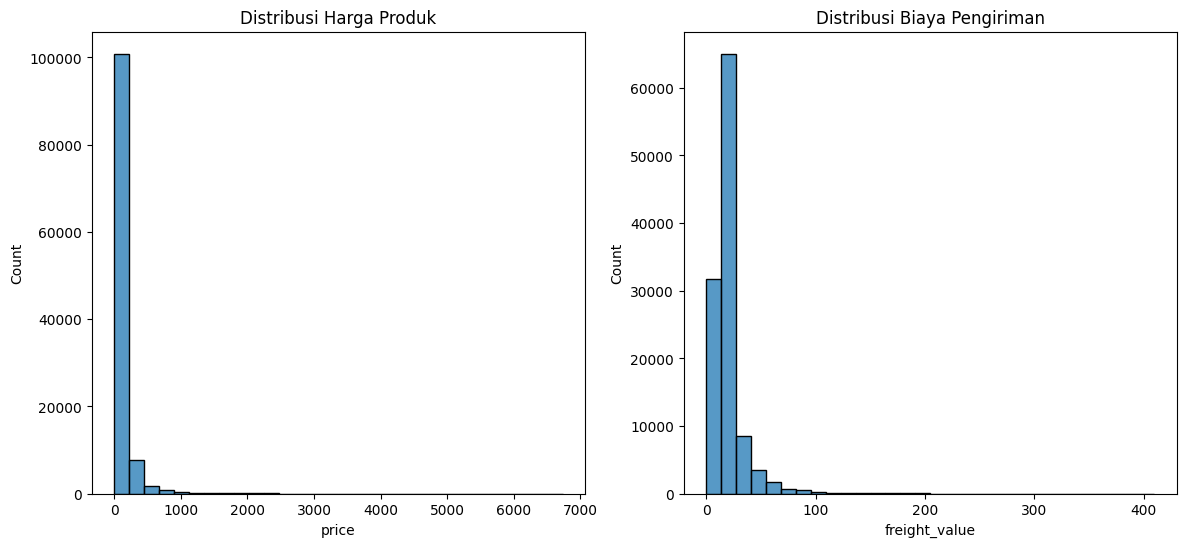

In [175]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sn.histplot(merged_df['price'], kde=False, bins=30)
plt.title('Distribusi Harga Produk')

plt.subplot(1, 2, 2)
sn.histplot(merged_df['freight_value'], kde=False, bins=30)
plt.title('Distribusi Biaya Pengiriman')
plt.show()

membuat diagram batang sesuai hasil perhitungan

### Pertanyaan 2:

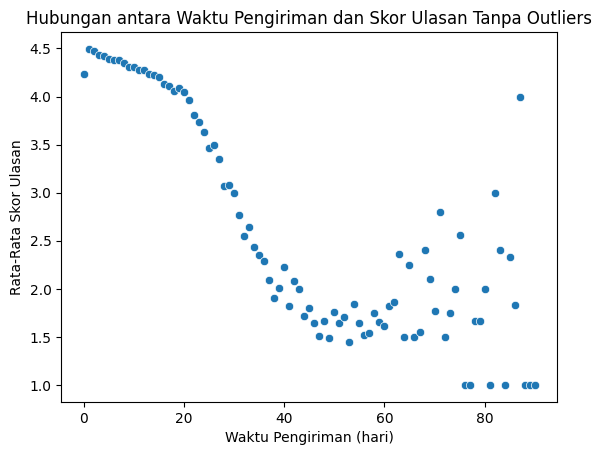

In [170]:
sn.scatterplot(data=delivery_review_relation, x='delivery_time', y='review_score')
plt.title('Hubungan antara Waktu Pengiriman dan Skor Ulasan Tanpa Outliers')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Rata-Rata Skor Ulasan')
plt.show()

visualisasi scatterplot berdasarkan perhitungan

## Conclusion

- Conclution pertanyaan 1
  1. Histogram pertama:
    1. Produk didominasi oleh produk dengan harga rendah
    2. beberapa pengecualian yang memiliki harga lebih tinggi mungkin menarik lebih banyak pembeli karena pertimbangan pribadi
    3. harga yang rendah lebih banyak diminati
    4. Bisnis e-commerce harus mempertahankan harga yang kompetitif untuk menarik dan mempertahankan pelanggan.
    5. dilihat dari histogram menunjukkan pembeli sensitif terhadap harga karena semakin mahal, perbedaan penjualan sangat drastis
  2. Histogram kedua:
    1. Mirip dengan distribusi harga produk, customer banyak melakukan pesanan dengan biaya pengiriman yang cenderung rendah
    2. Ada beberapa pesanan dengan biaya pengiriman yang lebih tinggi, tetapi jumlahnya menurun secara signifikan saat biaya pengiriman meningkat
  3. Strategi:
    1. Dengan adanya hasil tersebut, ada peluang untuk membuat promosi bundling produk untuk meningkatkan penjualan barang yang lebih mahal (membuat diskon bundling)
    2. e-commerce harus tetap memberi transparansi biaya pengiriman untuk tetap mendapat kepercayaan customer
    3. mungkin perlu mempertimbangkan optimasi logistik untuk menawarkan biaya pengiriman yang lebih rendah atau opsi pengiriman yang lebih cepat sebagai nilai tambah bagi pelanggan.

- Conclution pertanyaan 2
  1. rating ulasan cenderung lebih tinggi ketika waktu pengiriman lebih singkat yang menunjukkan bahwa customer lebih puas ketika menerima pesanan dengan cepat
  2. terdapat tren penurunan kepuasan pelanggan yang jelas saat waktu pengiriman bertambah
  3. e-commerce harus perbaiki proses logistik untuk memastikan pengiriman yang lebih cepat
  4. disarankan untuk bekerja sama dengan perusahaan logistik yang memiliki reputasi baik untuk kecepatan dan keandalan pengiriman
  5. buat tawaran berbagai opsi pengiriman, termasuk pengiriman cepat bagi customer yang membutuhkannya

In [182]:
orders_items_df = pd.merge(
    left=orders_df,
    right=order_items_df,
    how="left",
    on="order_id"
)

all_df = pd.merge(
    left=orders_items_df,
    right=order_reviews_df,
    how="left",
    on="order_id"
)

all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time,order_item_id,...,seller_id,shipping_limit_date,price,freight_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,1.0,...,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,a54f0611adc9ed256b57ede6b6eb5114,4.0,recomendo,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,1.0,...,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9.0,1.0,...,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,e73b67b67587f7644d5bd1a52deb1b01,5.0,Excelente,not_exist,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,1.0,...,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,Excelente,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2.0,1.0,...,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,e50934924e227544ba8246aeb3770dd4,5.0,Excelente,not_exist,2018-02-17 00:00:00,2018-02-18 13:02:51


In [183]:
all_df.to_csv("main_data.csv", index=False)